# Initialization

## Configuring Google Drive directory

In [55]:
# Ensuring running on TensorFlow 2.X
%tensorflow_version 2.x

# Load the TensorBoard notebook extension
%load_ext tensorboard

# This cell imports the drive library and mounts your Google Drive as a VM local drive. You can access to your Drive files 
# using this path "/content/gdrive/My Drive/"
from google.colab import drive            
drive.mount('/content/gdrive')

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard
Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [56]:
# Simplify path using symbolic link!
!ln -s "/content/gdrive/My Drive/Projects/bangkit/" /mydrive

# Testing the directory
!ls /mydrive
!pwd

ln: failed to create symbolic link '/mydrive/bangkit': File exists
bangkit  project01-pneumonia_classifier
/content/gdrive/My Drive/Projects/bangkit/project01-pneumonia_classifier/main


In [57]:
# Configuring main directory
%cd /mydrive/project01-pneumonia_classifier/main
!ls


/content/gdrive/My Drive/Projects/bangkit/project01-pneumonia_classifier/main
bangkit-project01.ipynb		   train01-xception-rmsprop.ipynb
dataviz.ipynb			   train02-xception-adam_half-plateau_02.ipynb
train00-xception-adam.ipynb	   train03-xception-adam_half.ipynb
train01-xception-no_augment.ipynb  train04-xception-adam_half-plateau_05.ipynb


## Importing Modules

In [58]:
import os
import glob
import shutil

import cv2
import tensorflow as tf
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.image as mimg

from skimage.io import imread
from tensorflow.keras.preprocessing.image import ImageDataGenerator

color = sns.color_palette()
%matplotlib inline
seed_number = 24

# Set seed nunmber to all packages
np.random.seed(seed_number)
tf.random.set_seed(seed_number)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory
root = "../input"
print(f"Main directories\t: {os.listdir(root)}")
input_dir = os.path.join(root, "demo", "chest_xray")
print(f"Dataset sub-directories\t: {os.listdir(input_dir)}")
print(f"Train set directory\t: {os.listdir(os.path.join(input_dir, 'train'))}")

# Any results you write to the current directory are saved as output.

Main directories	: ['xception', 'chest-xray-pneumonia', 'demo']
Dataset sub-directories	: ['val', 'test', 'train']
Train set directory	: ['NORMAL', 'PNEUMONIA']


# Observing the Dataset
Grasping some of the dataset information

In [59]:
# Create train, val and test directories
train_dir = os.path.join(input_dir, 'train')
val_dir = os.path.join(input_dir, 'val')
test_dir = os.path.join(input_dir, 'test')

dir_dict = {'train': train_dir, 'val': val_dir, 'test': test_dir}
label_name = os.listdir(os.path.join(input_dir, 'train'))
case_count, img_disp, set_length  = {}, {}, {}

for key, val in dir_dict.items():
    case_count[key] = {}
    img_disp[key] = {}
    set_count = 0
    
    for label in label_name:
        label_list = list(glob.glob(os.path.join(val, label, "*.jpeg")))
        case_count[key][label] = len(label_list)
        set_count += len(label_list)
        img_disp[key][label] = label_list[0]
        
    set_length[key] = set_count

case_count_df = pd.DataFrame(case_count)
img_disp_df = pd.DataFrame(img_disp)
print(f"Dataset summary:\n\n{case_count_df}")

Dataset summary:

           train  val  test
NORMAL         1    1     1
PNEUMONIA      1    1     1


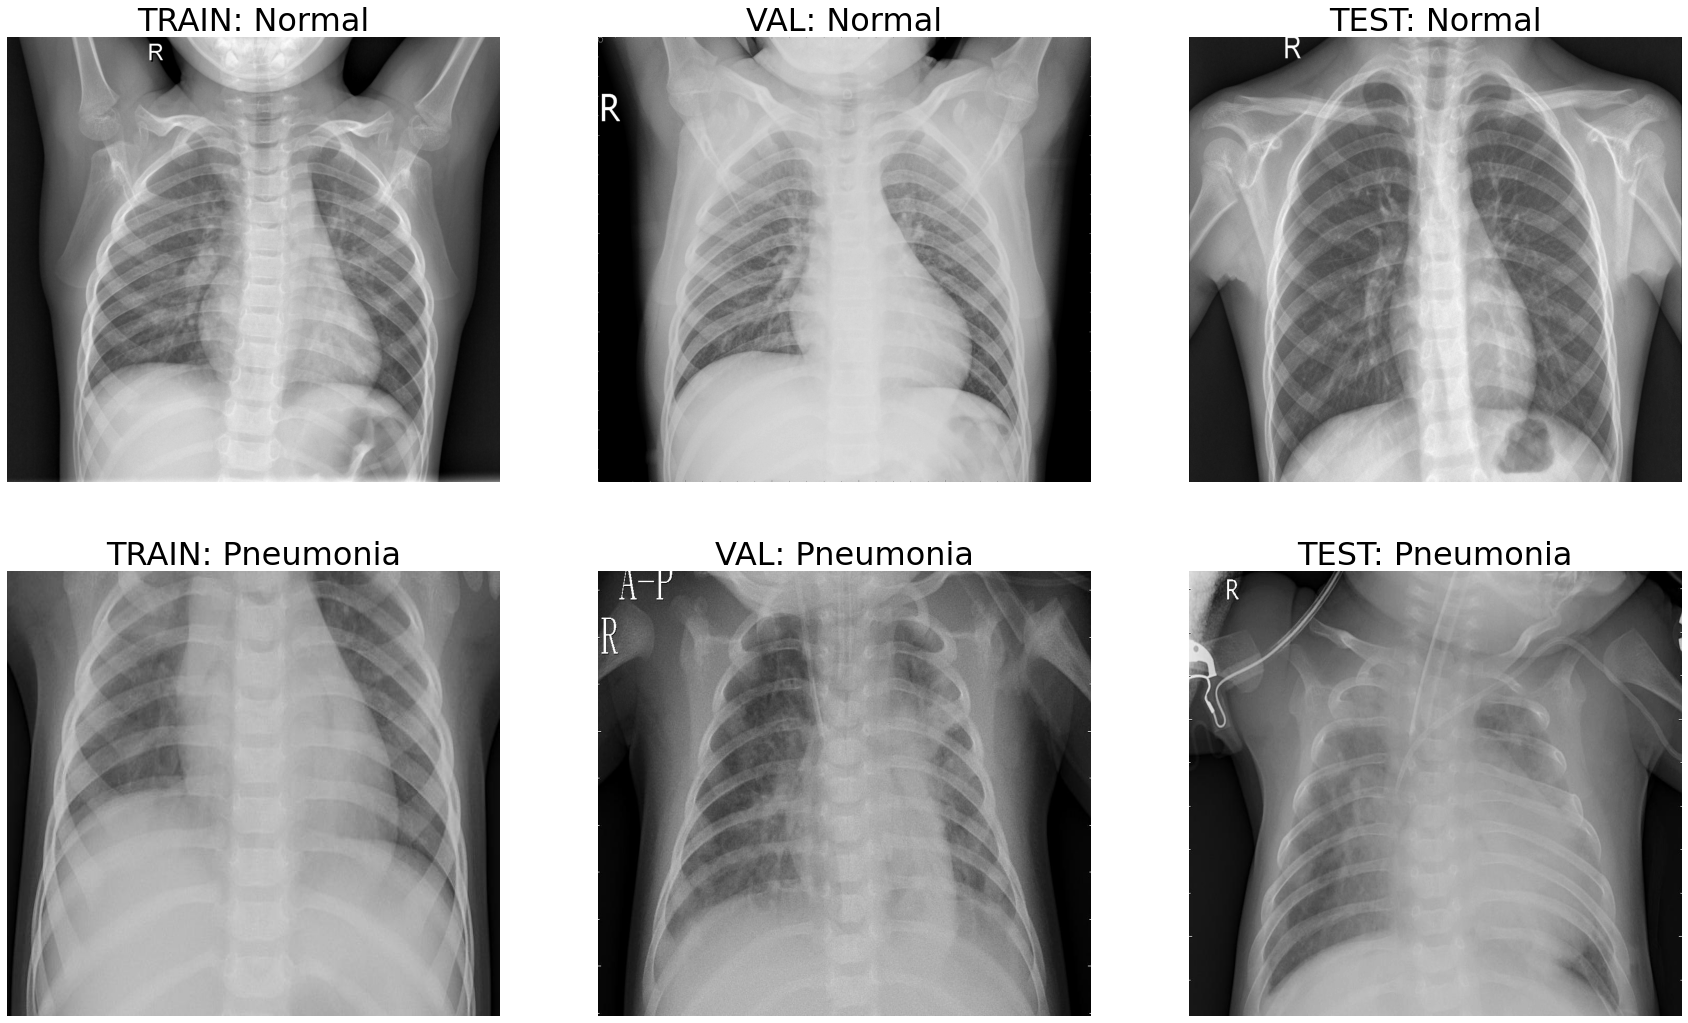

In [60]:
# Visualizing some of the data set
num_classes = len(label_name)
f, ax = plt.subplots(num_classes, 3, figsize=(30, 18))

for k in range(num_classes*3):
    j, i = k//3, k%3  # Image indexing
    
    img = imread(img_disp_df.iloc[j, i])
    ax[j, i].imshow(img, cmap='gray')
    ax[j, i].set_title(f"{img_disp_df.columns[i].upper()}: {img_disp_df.index[j].capitalize()}", fontsize=32)
    ax[j, i].axis('off')
    ax[j, i].set_aspect('auto')
plt.show()

## Dataset Visualization
In this section, all kind of image augmentation methods that are applied to the network will be visualized individually, the augmentation/transform methods are as the followings:


1.   Pixel value rescaling (won't be visualized). 
2.   Rotation.
3.   Shifting (horizontal and vertical).
4.   Shear.
5.   Zoom.
6.   Flipping (horizontal-wise only).

*Note: image size rescaling is also applied due to the network input requirement, in this case* ***299 x 299*** 



> The following dataset visualization are obtained directly from the tensorflow's ImageDataGenerator instance, hence for each example will be plotted several times due to the randomness given by the ImageDataGenerator



In [67]:
# Define the original image, using the normal labelled image from the train set
original_datagen = ImageDataGenerator(rescale = 1./255)
original_data = original_datagen.flow_from_directory(train_dir,
                                                     class_mode = 'binary',
                                                     target_size = (299, 299),
                                                     seed = seed_number,
                                                     shuffle=False)
original_img = original_data[0][0][0]

# This function will plot the original and augmented images, respectively,
# in the form of a grid with 1 row and 2 columns.
def plotImages(images_arr):
    fig, axes = plt.subplots(1, 2, figsize=(8, 8))
    axes = axes.flatten()

    title_name = ['Original', 'Augmented']
    i = 0
    for img, ax in zip(images_arr, axes):
        ax.imshow(img)
        ax.set_title(title_name[i], fontsize=18)
        i += 1

    plt.tight_layout()
    plt.show()

Found 2 images belonging to 2 classes.


### 1. Rotating augmentation visualization

Found 2 images belonging to 2 classes.


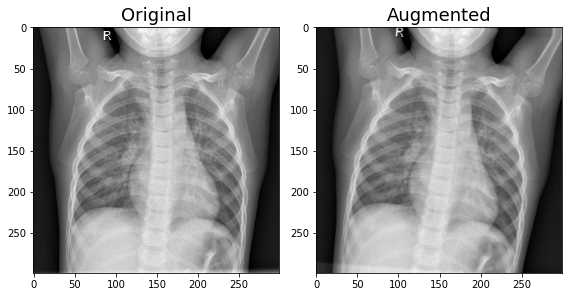

In [69]:
# Instantiate data generator for training procedure
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   rotation_range = 5)

train_data = train_datagen.flow_from_directory(train_dir,
                                              class_mode = 'binary',
                                              target_size = (299, 299),
                                              seed = seed_number,
                                              shuffle=False)
# Visualizing the data
rotate_img = train_data[0][0][0]
plotImages([original_img, rotate_img])

### 2. Shifting (horizontal and vertical) augmentation visualization

Found 2 images belonging to 2 classes.


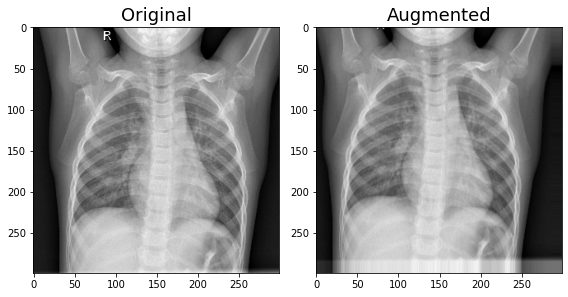

In [70]:
# Instantiate data generator for training procedure
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   width_shift_range = 0.1,
                                   height_shift_range = 0.05)

train_data = train_datagen.flow_from_directory(train_dir,
                                              class_mode = 'binary',
                                              target_size = (299, 299),
                                              seed = seed_number,
                                              shuffle=False)
# Visualizing the data
shift_img = train_data[0][0][0]
plotImages([original_img, shift_img])

### 3. Shear augmentation visualization

Found 2 images belonging to 2 classes.


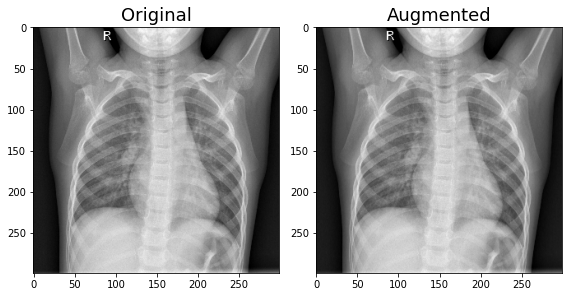

In [71]:
# Instantiate data generator for training procedure
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.1)

train_data = train_datagen.flow_from_directory(train_dir,
                                              class_mode = 'binary',
                                              target_size = (299, 299),
                                              seed = seed_number,
                                              shuffle=False)
# Visualizing the data
shear_img = train_data[0][0][0]
plotImages([original_img, shear_img])

### 4. Zoom augmentation visualization

Found 2 images belonging to 2 classes.


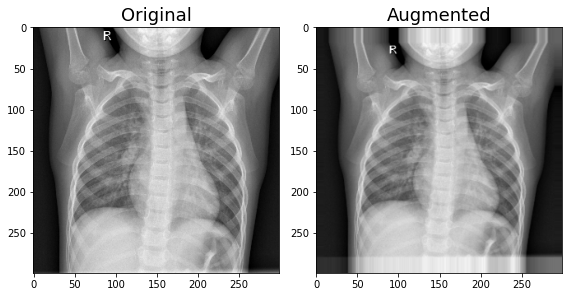

In [72]:
# Instantiate data generator for training procedure
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   zoom_range = 0.15)

train_data = train_datagen.flow_from_directory(train_dir,
                                              class_mode = 'binary',
                                              target_size = (299, 299),
                                              seed = seed_number,
                                              shuffle=False)
# Visualizing the data
zoom_img = train_data[0][0][0]
plotImages([original_img, zoom_img])

### 5. Horizontal flipping augmentation visualization


> For the sake of visualization only, horizontal flipping is performed manually by reversing the horizontal index (via slicing). However, in the real implementation it's applied directly within the ImageDataGenerator instance.




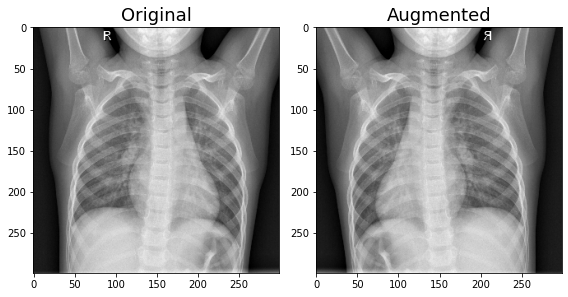

In [73]:
# Visualizing the data
flip_img = original_img[:, ::-1, :]
plotImages([original_img, flip_img])

## Plotting all the augmentation visualization altogether


> Notice that there are some artifact occurance during the image augmentation (e.g., on the lower side of the *Shifted* and *Zoomed* image.


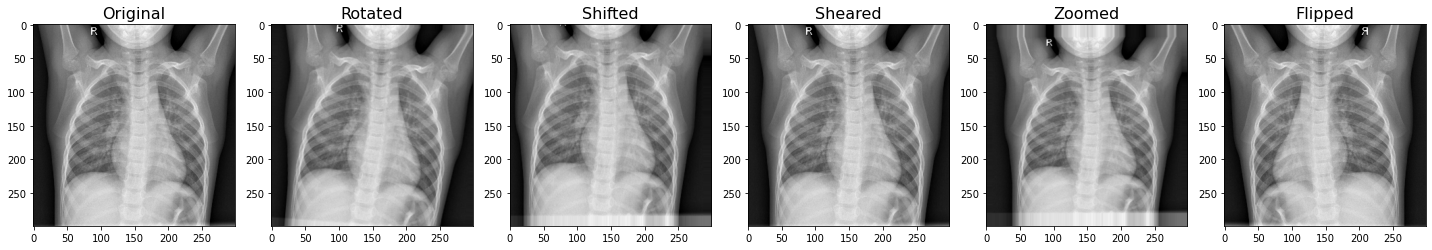

In [75]:
disp_images = [original_img, rotate_img, shift_img, shear_img, zoom_img, flip_img]
fig, axes = plt.subplots(1, len(disp_images), figsize=(20,20))
axes = axes.flatten()

title_name = ['Original', 'Rotated', 'Shifted', 'Sheared', 'Zoomed', 'Flipped']
i = 0

for img, ax in zip(disp_images, axes):
    ax.imshow(img)
    ax.set_title(title_name[i], fontsize=16)
    i += 1

plt.tight_layout()
plt.show()